In [1]:
from TSPGraph import Graph
import numpy as np
from functools import lru_cache
import copy
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
import matplotlib.patches as mpatches

In [2]:
graph = Graph('A')

In [3]:
def random_solution():
    sol = np.random.choice(np.arange(200),size=100,replace=False)
    return np.append(sol,sol[0])

In [4]:
combination_pairs = [(x,y) for x in range(1,100) for y in range(x+2, 100)]
combination_pairs_edges = [(x,y) for x in range(1,100) for y in range(x+2, 100)]

In [5]:
def ExchangeVertices(solution, i, j):
    result = copy.deepcopy(solution)
    result[[i,j]] = result[[j,i]]
    return result

def ExchangeVerticesDelta(graph, solution, i, j):
    res = (graph.dist_matrix[solution[i-1], solution[j]] + graph.dist_matrix[solution[j], solution[i+1]] + graph.dist_matrix[solution[j-1], solution[i]] + graph.dist_matrix[solution[i], solution[j+1]]) - (graph.dist_matrix[solution[i-1], solution[i]] + graph.dist_matrix[solution[i], solution[i+1]] + graph.dist_matrix[solution[j-1], solution[j]] + graph.dist_matrix[solution[j], solution[j+1]])
    # check = graph.cycle_cost(ExchangeVertices(solution,i,j)) - graph.cycle_cost(solution)
    # print(res)
    # print(check)
    # print(solution)
    # print(ExchangeVertices(solution,i,j))
    # assert check == res
    return res

def MinInAllExchangedVertices(graph, solution):
    minDelta = 0
    resultExchange = tuple()
    for x in combination_pairs:
        delta = ExchangeVerticesDelta(graph, solution, x[0], x[1])
        if delta < minDelta:
            minDelta = delta
            resultExchange = (x[0], x[1])
    return (minDelta, resultExchange)

def GreedyExchangeVertex(graph, solution):
    for x in combination_pairs:
        delta = ExchangeVerticesDelta(graph, solution, x[0], x[1])
        if delta < 0:
            return (x[0], x[1])
    return None


MinInAllExchangedVertices(graph, random_solution())
# ExchangeVerticesDelta(graph, random_solution(), 1, 5)

(-9078, (15, 28))

In [6]:
def ExchangeEdges(solution, i, j):
    assert i<j
    result = copy.deepcopy(solution)
    # print(i,j)
    # print(result[:i])
    # print(result[j:i-1:-1])
    # print(result[j+1:])
    result = np.concatenate((result[:i], result[j:i-1:-1], result[j+1:]))
    return result

def ExchangeEdgesDelta(graph, solution, i, j):
    assert i<j
    res = (graph.dist_matrix[solution[i-1], solution[j]] + graph.dist_matrix[solution[i], solution[j+1]]) - (graph.dist_matrix[solution[i-1], solution[i]] + graph.dist_matrix[solution[j], solution[j+1]])
    # check = graph.cycle_cost(ExchangeEdges(solution,i,j)) - graph.cycle_cost(solution)
    # print(res)
    # print(check)
    # print(solution)
    # print(ExchangeEdges(solution,i,j))
    # assert res == check
    return res

def MinInAllExchangedEdges(graph, solution):
    minDelta = 0
    resultExchange = tuple()
    for x in combination_pairs_edges:
        delta = ExchangeEdgesDelta(graph, solution, x[0], x[1])
        if delta < minDelta:
            minDelta = delta
            resultExchange = (x[0], x[1])
    return (minDelta, resultExchange)

def GreedyExchangeEdges(graph, solution):
    for x in combination_pairs_edges:
        delta = ExchangeEdgesDelta(graph, solution, x[0], x[1])
        if delta < 0:
            return (x[0], x[1])
    return None

MinInAllExchangedEdges(graph, random_solution())

(-5180, (24, 38))

In [7]:

def SwapVertexWithNewOne(solution, i, a):
    result = copy.deepcopy(solution)
    result[i] = a
    return result

def SwapVertexWithNewOneDelta(graph, solution, i, a):
    return (graph.objective[solution[i-1], a] + graph.objective[a, solution[i+1]]) - (graph.objective[solution[i-1], solution[i]] + graph.objective[solution[i], solution[i+1]])

def MinInAllSwaps(solution, graph):
    domain = np.array(range(200))
    not_in_sol = domain[np.isin(domain, solution, invert=True)]
    #pairs of index in current cycle - node 
    pairs = np.transpose([np.tile(domain[:100], 100), np.repeat(not_in_sol, 100)])
    minDelta = 0
    resultSwap = tuple()
    for x in pairs:
        delta = SwapVertexWithNewOneDelta(graph, solution, x[0], x[1])
        if delta < minDelta:
            minDelta = delta
            resultSwap = (x[0], x[1])
    return (minDelta, resultSwap)

def GreedySwap(solution, graph):
    domain = np.array(range(200))
    not_in_sol = domain[np.isin(domain, solution, invert=True)]
    #pairs of index in current cycle - node 
    pairs = np.transpose([np.tile(domain[:100], 100), np.repeat(not_in_sol, 100)])
    for x in pairs:
        delta = SwapVertexWithNewOneDelta(graph, solution, x[0], x[1])
        if delta < 0:
            return (x[0], x[1])
    return None
print(MinInAllSwaps(random_solution(), graph))

(-6198, (29, 55))


In [8]:
def GreedyLocalSearch(graph, initial_solution, type):
    current_solution = initial_solution
    current_cost = graph.cycle_cost(current_solution)
    max_iter = 1_000_000
    while(max_iter > 0):
        # print(current_cost)
        max_iter -= 1

        swap = GreedySwap(current_solution, graph)
        if swap is not None:
            current_solution = SwapVertexWithNewOne(current_solution, swap[0], swap[1])
            continue
        if type == 'edge':
            exchange = GreedyExchangeEdges(graph, current_solution)
            if exchange is not None:
                current_solution = ExchangeEdges(current_solution, exchange[0], exchange[1])
                continue
        else:
            exchange = GreedyExchangeVertex(graph, current_solution)
            if exchange is not None:
                current_solution = ExchangeVertices(current_solution, exchange[0], exchange[1])
                continue
        break

        
        # current_cost = graph.cycle_cost(current_solution)
    return current_solution
        
GreedyLocalSearch(graph, random_solution(), 'edge')

C:\Users\cichy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


array([  0,  38,  69,  35,  19,  58, 193, 164,   3,  34,  37,  70,  59,
        27, 185,  23,  57,  10,  36, 132,  55,  28,  15, 108, 120, 171,
        21, 170, 127, 186,  88, 153,  50, 121,   4,  77,  29, 192,   9,
       126,  17, 173,  39,  41,   1, 189, 109, 130,  92,  48,  16,  11,
       162, 198, 148,  13,   8, 105, 123, 168,  14, 111,  42,  89,  12,
       190,  98,   6, 196,   5, 112, 165,  31,  95,  26,  33,  90,  99,
        78,  24,  87, 141,  44, 102,  32,  93,   7,  53,  18,  22,  30,
       138,  74, 142,  61,  71,  56,  20, 140,  25, 181])

In [9]:
def GreedyExperiment(graph, type):
    steep_random_vertex = []
    for i in tqdm(range(1000)):
        steep_random_vertex.append(GreedyLocalSearch(graph, random_solution(), type))
    return np.array(steep_random_vertex)
#GreedyExperiment(graph,  'edge')

In [10]:
def CommonEdges(a,b):
    x, y = set(), set()
    for i in range(100):
        x.add((a[i], a[i+1]))
        y.add((b[i],b[i+1]))
    return x.intersection(y)
len(CommonEdges(random_solution(), random_solution()))

0

In [11]:
def SimmilarityExperiment(solutions):
    best_sol = solutions[np.argmin([graph.cycle_cost(sol) for sol in solutions])]
    best_sol_set = set(best_sol)
    best_results = []
    for sol in solutions:
        best_results.append((len(CommonEdges(best_sol, sol)), len(best_sol_set.intersection(set(sol)))))
    avg_results = []
    for sol in solutions:
        x = 0
        y = 0
        curr_set = set(sol)
        for sol2 in solutions:
            x += len(CommonEdges(sol2, sol))
            y += len(curr_set.intersection(set(sol2)))
        avg_results.append((x/len(solutions), y/len(solutions)))
    return (best_results, avg_results)

In [12]:
def SimmilarityPlot(graph, dataset, solutions, simmilarities):
    best_simmilarity, avg_simmiliarity = simmilarities
    df = pd.DataFrame()
    df["x"] = [graph.cycle_cost(sol) for sol in solutions]
    df["y_best_nodes"] = [sim[1] for sim in best_simmilarity]
    df["y_best_edges"] = [sim[0] for sim in best_simmilarity]
    df["y_avg_edges"] = [sim[0] for sim in avg_simmiliarity]
    df["y_avg_nodes"] = [sim[1] for sim in avg_simmiliarity]

    sns.lmplot(x="x",y="y_best_nodes",data=df)
    plt.title("Best node simmilarity for graph "+dataset)
    plt.ylabel("Node simmilarity")
    plt.xlabel("Cost")
    plt.legend(handles=[mpatches.Patch(color='white', label='correlation: {r:.2f}'.format(r=np.corrcoef(df["x"],df["y_best_nodes"])[1,0]))])
    plt.show()
    sns.lmplot(x="x",y="y_best_edges",data=df)
    plt.title("Best edge simmilarity for graph "+dataset)
    plt.ylabel("Edge simmilarity")
    plt.xlabel("Cost")
    plt.legend(handles=[mpatches.Patch(color='white', label='correlation: {r:.2f}'.format(r=np.corrcoef(df["x"],df["y_best_edges"])[1,0]))])
    plt.show()
    sns.lmplot(x="x",y="y_avg_nodes",data=df)
    plt.title("Average node simmilarity for graph "+dataset)
    plt.ylabel("Node simmilarity")
    plt.xlabel("Cost")
    plt.legend(handles=[mpatches.Patch(color='white', label='correlation: {r:.2f}'.format(r=np.corrcoef(df["x"],df["y_avg_nodes"])[1,0]))])
    plt.show()
    sns.lmplot(x="x",y="y_avg_edges",data=df)
    plt.title("Average edge simmilarity for graph "+dataset)
    plt.ylabel("Edge simmilarity")
    plt.xlabel("Cost")
    plt.legend(handles=[mpatches.Patch(color='white', label='correlation: {r:.2f}'.format(r=np.corrcoef(df["x"],df["y_avg_edges"])[1,0]))])
    plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\cichy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


100%|██████████| 1000/1000 [50:49<00:00,  3.05s/it] 


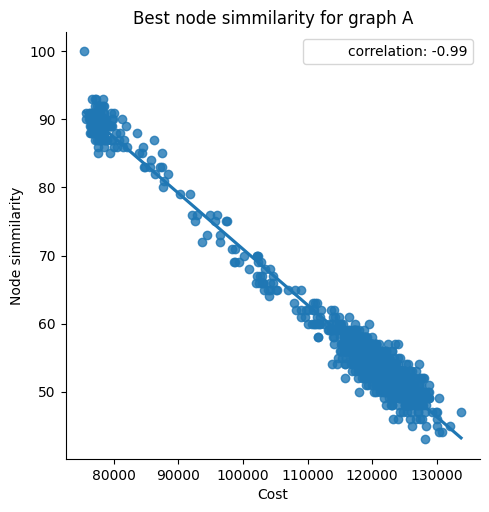

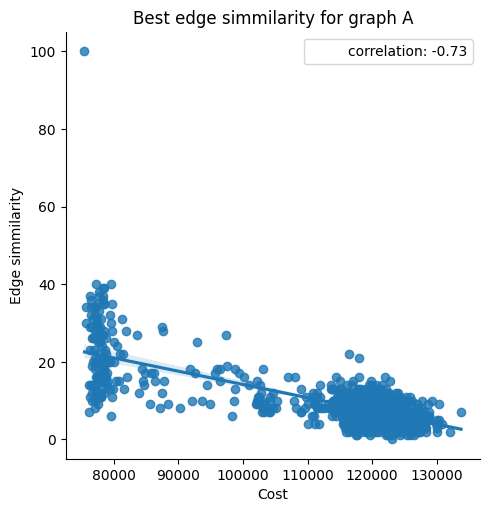

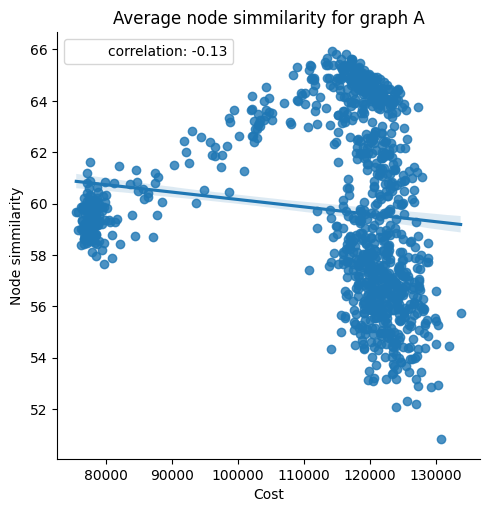

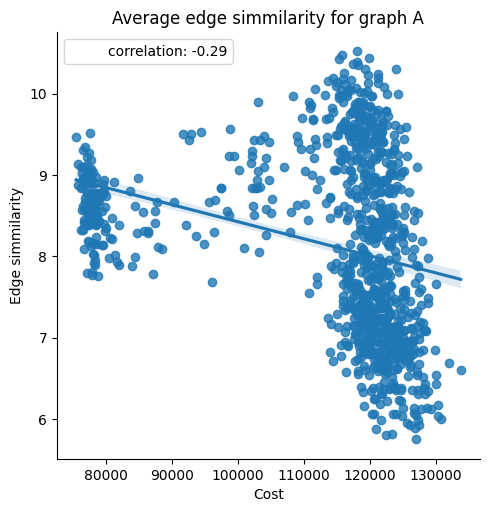

In [13]:
graph = Graph('A')
greedy_solutions = GreedyExperiment(graph,  'edge')
results_to_plot = SimmilarityExperiment(greedy_solutions)
SimmilarityPlot(graph,'A',greedy_solutions, results_to_plot)

  0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\cichy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)
100%|██████████| 1000/1000 [51:15<00:00,  3.08s/it] 


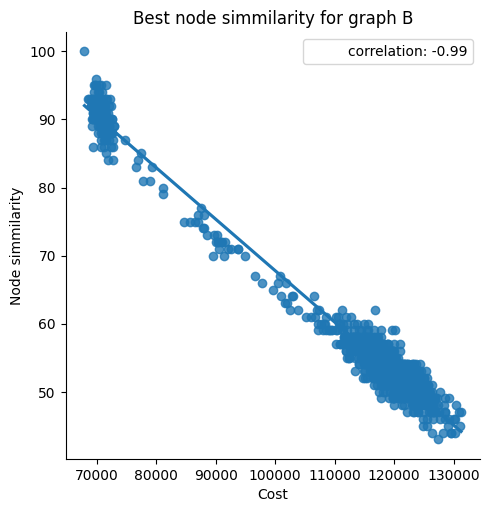

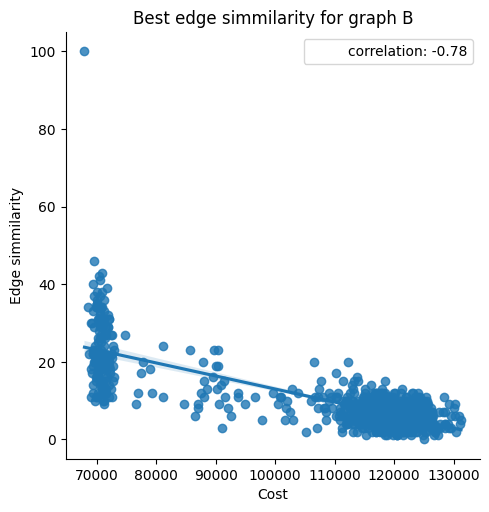

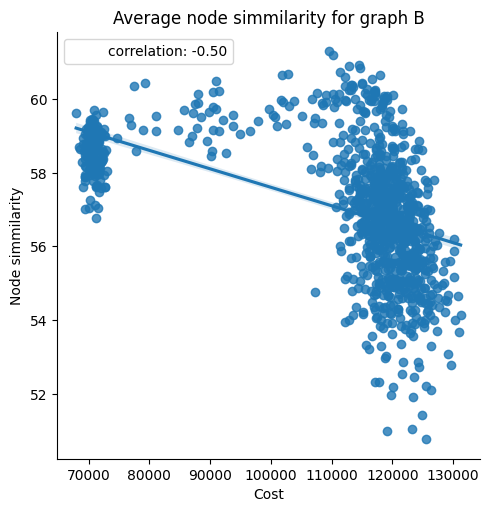

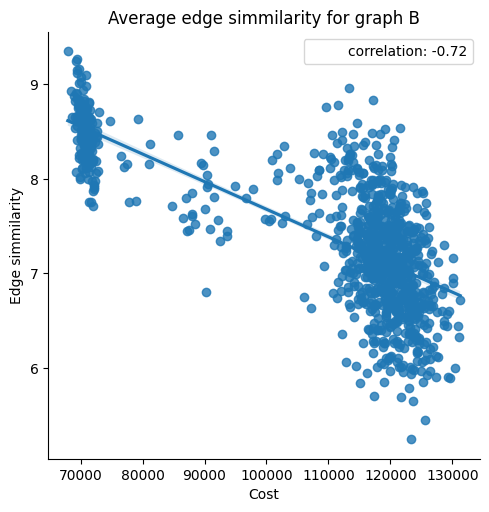

In [14]:
graph = Graph('B')
greedy_solutions = GreedyExperiment(graph,  'edge')
results_to_plot = SimmilarityExperiment(greedy_solutions)
SimmilarityPlot(graph,'B',greedy_solutions, results_to_plot)

  0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\cichy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)
100%|██████████| 1000/1000 [44:34<00:00,  2.67s/it] 


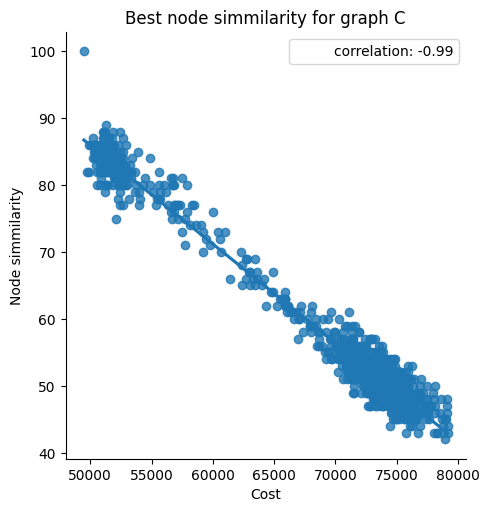

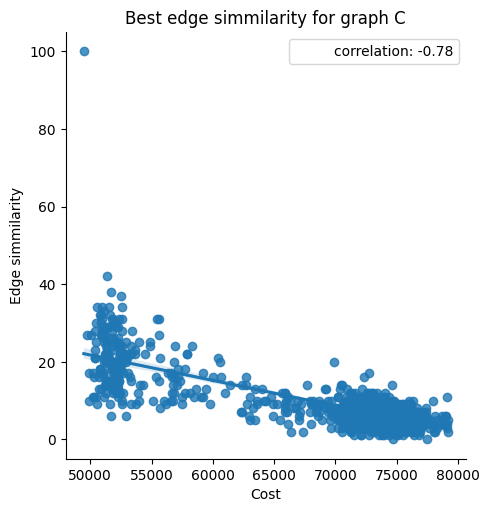

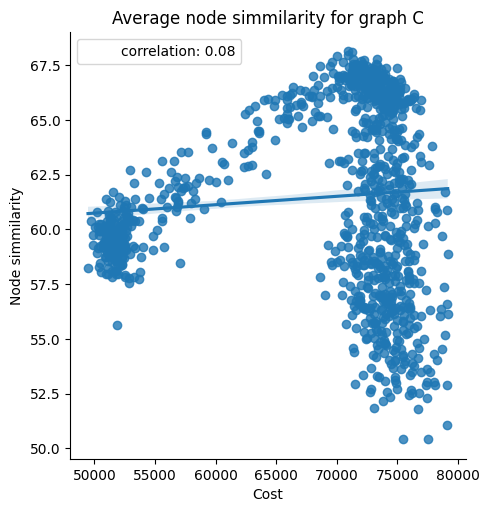

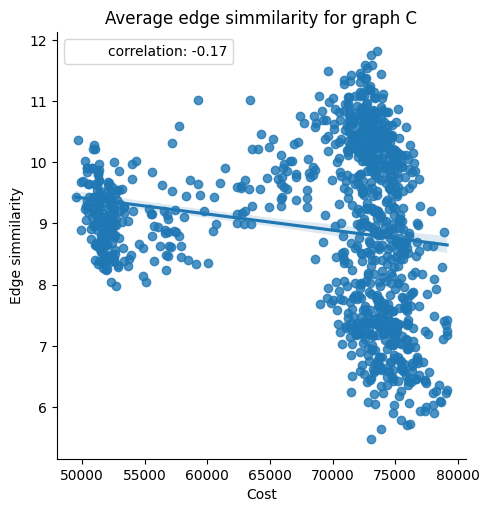

In [15]:
graph = Graph('C')
greedy_solutions = GreedyExperiment(graph,  'edge')
results_to_plot = SimmilarityExperiment(greedy_solutions)
SimmilarityPlot(graph,'C',greedy_solutions, results_to_plot)

  0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\cichy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)
100%|██████████| 1000/1000 [47:28<00:00,  2.85s/it] 


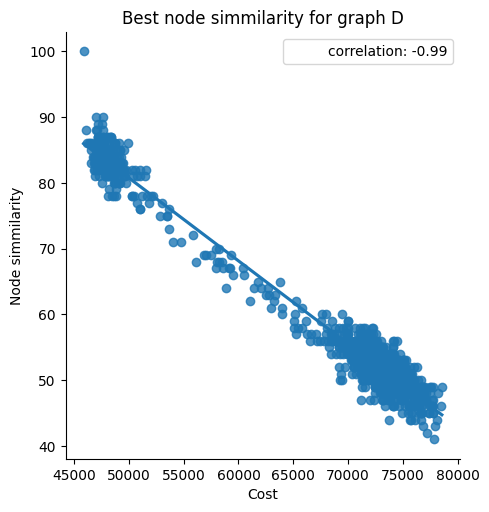

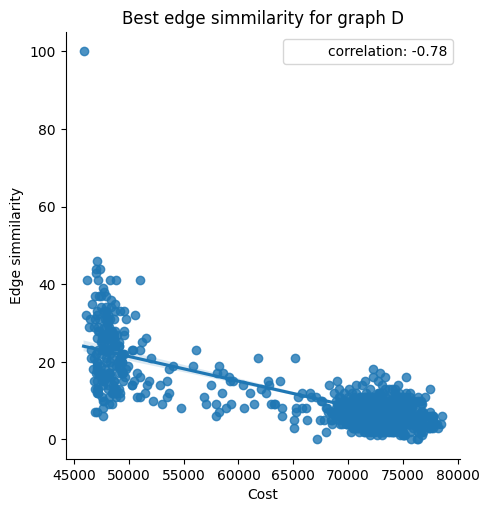

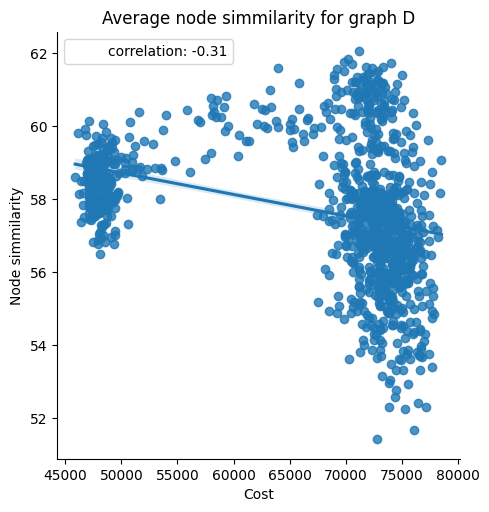

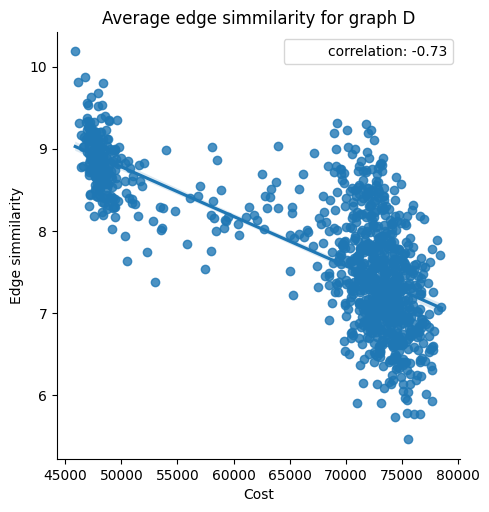

In [16]:
graph = Graph('D')
greedy_solutions = GreedyExperiment(graph,  'edge')
results_to_plot = SimmilarityExperiment(greedy_solutions)
SimmilarityPlot(graph,'D',greedy_solutions, results_to_plot)

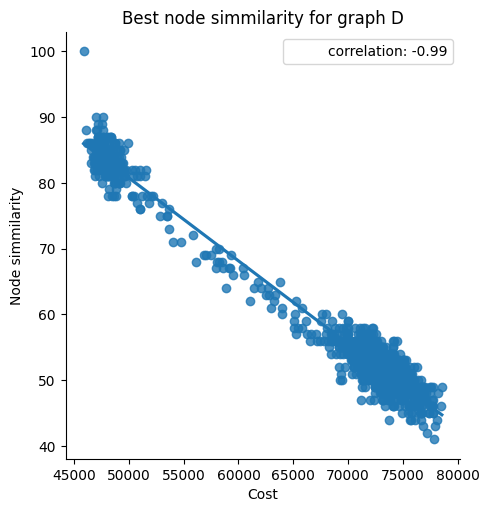

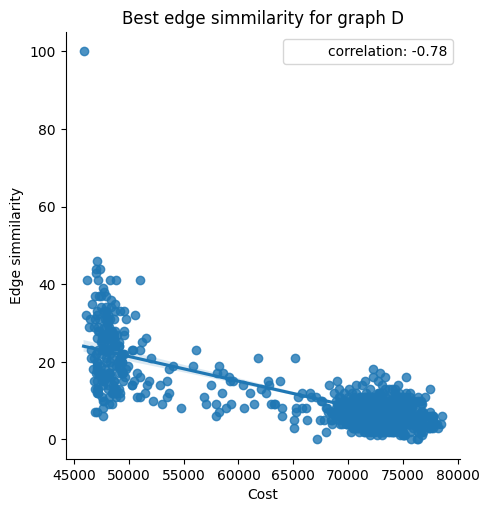

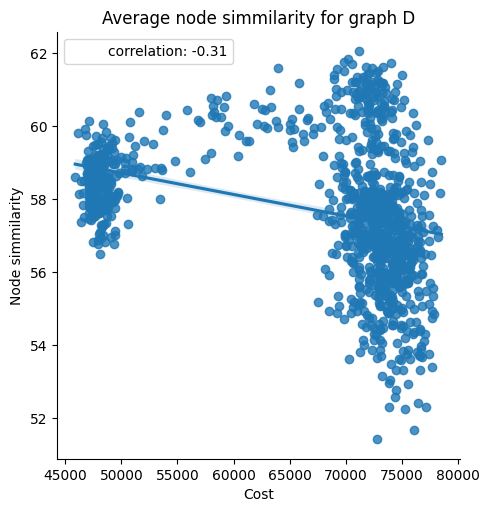

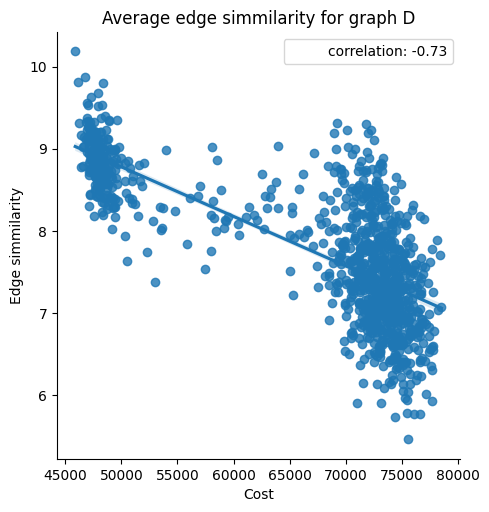

In [17]:
SimmilarityPlot(graph,'D',greedy_solutions, results_to_plot)